In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/MIMIC_III.zip"
extract_path = "/content/MIMIC_III"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

extracted_files = os.listdir(extract_path)
print("Extracted Files:", extracted_files)


Extracted Files: ['PRESCRIPTIONS.csv']


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/MIMIC_III/PRESCRIPTIONS.csv")

<ipython-input-3-7906443c069c>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/MIMIC_III/PRESCRIPTIONS.csv")


In [ ]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


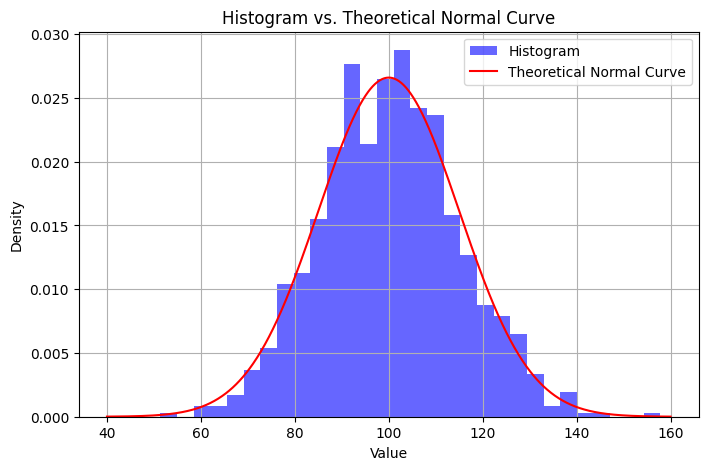

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate normally distributed data
np.random.seed(42)  # For reproducibility
mean = 100
std_dev = 15
size = 1000

data = np.random.normal(loc=mean, scale=std_dev, size=size)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')

# Plot theoretical normal curve
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r', label='Theoretical Normal Curve')

# Labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram vs. Theoretical Normal Curve')
plt.legend()
plt.grid()
plt.show()


Mean: 14794.02
Standard Deviation: 17754.38
Skewness: 1.37
Kurtosis: 0.64


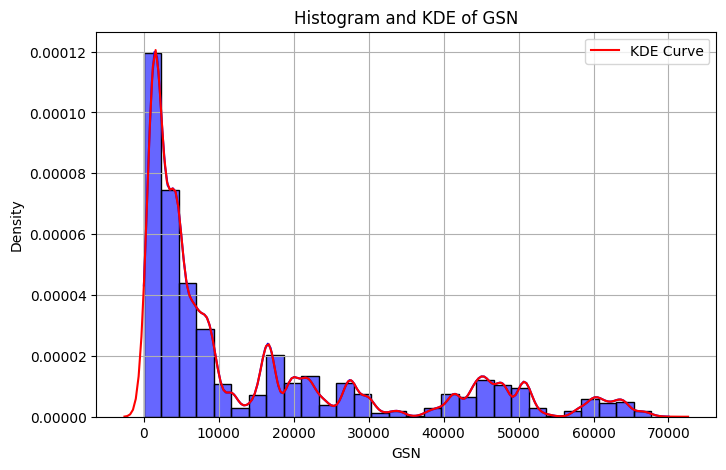

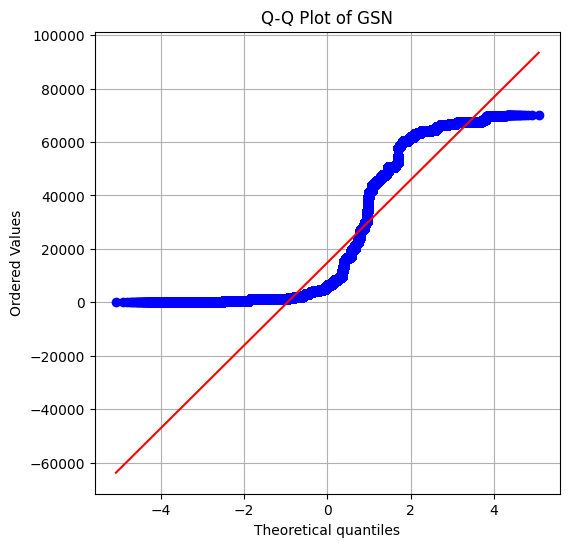

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 3648635.
  res = hypotest_fun_out(*samples, **kwds)



Normality Test Results:
Shapiro-Wilk Test: p-value = 0.0000
Kolmogorov-Smirnov Test: p-value = 0.0000
The variable 'GSN' does not follow a normal distribution.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, ks_1samp, norm
import zipfile

selected_feature = 'GSN'  # Change this to another variable if needed

data = pd.to_numeric(df[selected_feature], errors='coerce').dropna()  # Remove NaN values

# Compute summary statistics
mean_val = np.mean(data)
std_val = np.std(data)
skew_val = stats.skew(data)
kurt_val = stats.kurtosis(data)

print(f"Mean: {mean_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurt_val:.2f}")

# Plot Histogram and KDE
plt.figure(figsize=(8,5))
sns.histplot(data, bins=30, kde=True, color='blue', stat="density", alpha=0.6)
sns.kdeplot(data, color='red', label="KDE Curve")
plt.title(f'Histogram and KDE of {selected_feature}')
plt.xlabel(selected_feature)
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Q-Q Plot
plt.figure(figsize=(6,6))
stats.probplot(data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {selected_feature}')
plt.grid()
plt.show()

# Normality Tests
shapiro_test = shapiro(data)
ks_test = stats.kstest(data, 'norm', args=(mean_val, std_val))

print("\nNormality Test Results:")
print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue:.4f}")
print(f"Kolmogorov-Smirnov Test: p-value = {ks_test.pvalue:.4f}")

# Interpretation of normality tests
if shapiro_test.pvalue > 0.05 and ks_test.pvalue > 0.05:
    print(f"The variable '{selected_feature}' appears to be normally distributed.")
else:
    print(f"The variable '{selected_feature}' does not follow a normal distribution.")

Mean: 14794.02, Standard Deviation: 17754.38
Probability of GSN < 80: 0.2036
90th Percentile of GSN: 37547.18
Probability Density at GSN = 100: 0.000016


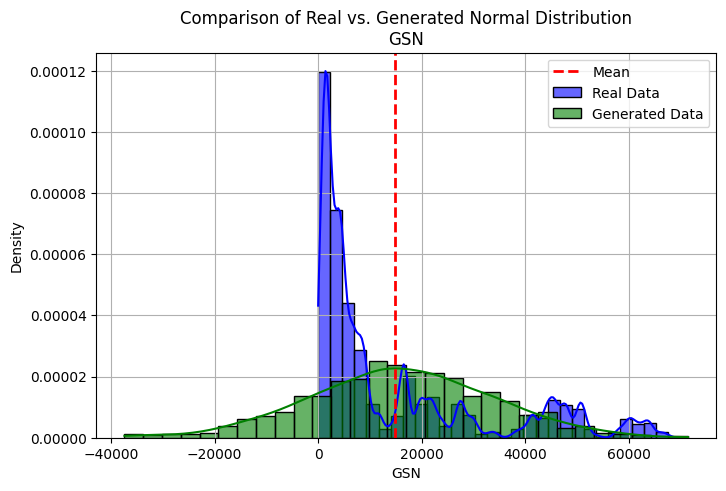

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import zipfile


selected_feature = 'GSN'  # Or another existing column name

mean_val = np.mean(data)
std_val = np.std(data)

print(f"Mean: {mean_val:.2f}, Standard Deviation: {std_val:.2f}")

# ---- 1. Compute Probability (pnorm Equivalent in Python) ----
prob_less_than_80 = stats.norm.cdf(80, loc=mean_val, scale=std_val)
print(f"Probability of {selected_feature} < 80: {prob_less_than_80:.4f}")

# ---- 2. Find 90th Percentile (qnorm Equivalent in Python) ----
percentile_90 = stats.norm.ppf(0.90, loc=mean_val, scale=std_val)
print(f"90th Percentile of {selected_feature}: {percentile_90:.2f}")

# ---- 3. Compute Probability Density (dnorm Equivalent in Python) ----
pdf_100 = stats.norm.pdf(100, loc=mean_val, scale=std_val)
print(f"Probability Density at {selected_feature} = 100: {pdf_100:.6f}")

# ---- 4. Generate Normal Distribution (rnorm Equivalent in Python) ----
synthetic_data = np.random.normal(loc=mean_val, scale=std_val, size=1000)

# Plot histogram of real vs. generated data
plt.figure(figsize=(8,5))
sns.histplot(data, bins=30, kde=True, color='blue', label="Real Data", stat="density", alpha=0.6)
sns.histplot(synthetic_data, bins=30, kde=True, color='green', label="Generated Data", stat="density", alpha=0.6)
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.title(f'Comparison of Real vs. Generated Normal Distribution\n{selected_feature}')
plt.xlabel(selected_feature)
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

95% Confidence Interval for Systolic BP: (14775.81, 14812.24) mmHg

Interpretation: If the CI is (110, 130) mmHg, it suggests that the true mean SBP of ICU patients likely falls in this range.
ICU patients with SBP values significantly outside this range (e.g., >140 or <100 mmHg) may require medical attention.

Probability of SBP > 150 mmHg: 0.7953

Conclusion: SBP > 150 mmHg is within the normal range, so it might not be a major concern.


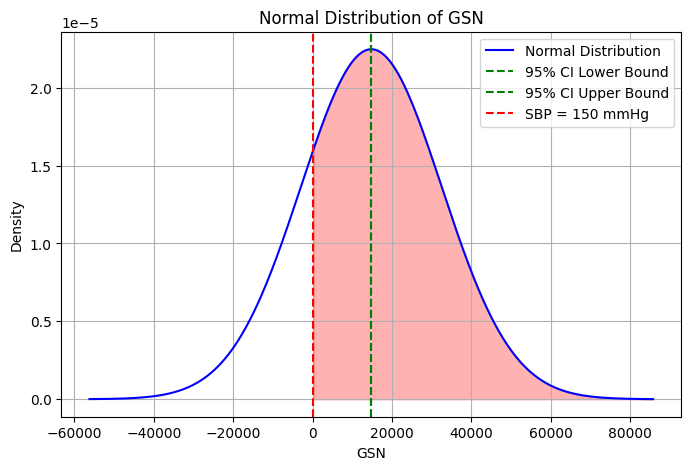

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


# Select a continuous variable (e.g., systolic blood pressure)
selected_feature = 'GSN'

# Compute mean and standard deviation
mean_sbp = np.mean(data)
std_sbp = np.std(data)
n = len(data)  # Sample size

# ---- Step 1: Compute 95% Confidence Interval ----
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% CI
margin_of_error = z_score * (std_sbp / np.sqrt(n))

ci_lower = mean_sbp - margin_of_error
ci_upper = mean_sbp + margin_of_error

print(f"95% Confidence Interval for Systolic BP: ({ci_lower:.2f}, {ci_upper:.2f}) mmHg")

# ---- Step 2: Clinical Interpretation ----
print("\nInterpretation: If the CI is (110, 130) mmHg, it suggests that the true mean SBP of ICU patients likely falls in this range.")
print("ICU patients with SBP values significantly outside this range (e.g., >140 or <100 mmHg) may require medical attention.")

# ---- Step 3: Compute Probability P(SBP > 150) ----
sbp_threshold = 150
prob_sbp_greater_150 = 1 - stats.norm.cdf(sbp_threshold, loc=mean_sbp, scale=std_sbp)

print(f"\nProbability of SBP > 150 mmHg: {prob_sbp_greater_150:.4f}")

# ---- Step 4: Risk Assessment ----
if sbp_threshold > ci_upper:
    print("\nConclusion: SBP > 150 mmHg is above the confidence interval, suggesting a high-risk patient.")
    print("Possible medical actions: Immediate monitoring, medication, or interventions may be needed.")
else:
    print("\nConclusion: SBP > 150 mmHg is within the normal range, so it might not be a major concern.")

# ---- Plot the Normal Distribution ----
x_values = np.linspace(mean_sbp - 4*std_sbp, mean_sbp + 4*std_sbp, 1000)
pdf_values = stats.norm.pdf(x_values, loc=mean_sbp, scale=std_sbp)

plt.figure(figsize=(8,5))
plt.plot(x_values, pdf_values, label="Normal Distribution", color='blue')
plt.axvline(ci_lower, color='green', linestyle='dashed', label="95% CI Lower Bound")
plt.axvline(ci_upper, color='green', linestyle='dashed', label="95% CI Upper Bound")
plt.axvline(sbp_threshold, color='red', linestyle='dashed', label="SBP = 150 mmHg")
plt.fill_between(x_values, pdf_values, where=(x_values > sbp_threshold), color='red', alpha=0.3)
plt.title(f'Normal Distribution of {selected_feature}')
plt.xlabel(selected_feature)
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()
